In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!unzip glasses-noglasses.zip

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing import image

Text(0.5, 1.0, 'No-Glasses')

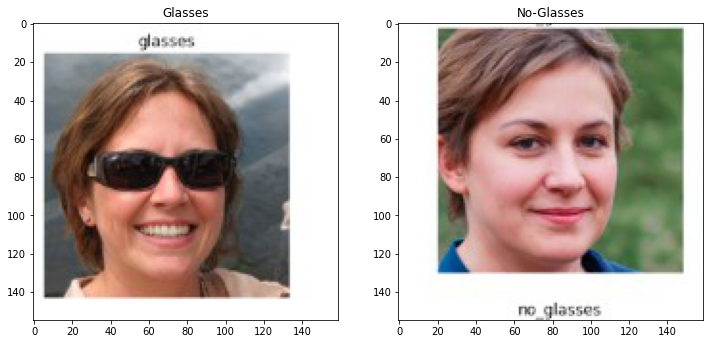

In [ ]:
glasses = image.load_img('/content/glasses-noglasses/train/glasses/row-1-column-1.jpg')
noglasses = image.load_img('/content/glasses-noglasses/train/noglasses/row-10-column-1.jpg')

fig = plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(glasses)
plt.title('Glasses')

plt.subplot(1, 2, 2)
plt.imshow(noglasses)
plt.title('No-Glasses')

In [ ]:
trdata = ImageDataGenerator()
traindt = trdata.flow_from_directory(directory='/content/glasses-noglasses/train', target_size=(224, 224))

tsdata = ImageDataGenerator()
testdt = trdata.flow_from_directory(directory='/content/glasses-noglasses/validate', target_size=(224, 224))

Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [ ]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
hist = model.fit_generator(steps_per_epoch=1, generator=traindt, validation_data=testdt, validation_steps=1, epochs=30, callbacks=early)

<ipython-input-36-102dc656dbae>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=1, generator=traindt, validation_data=testdt, validation_steps=1, epochs=30, callbacks=early)


Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 0.6772 - accuracy: 0.6250

1/1 [==============================] - 35s 35s/step - loss: 0.6772 - accuracy: 0.6250 - val_loss: 40034.5234 - val_accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 43494.7070 - accuracy: 0.5000

1/1 [==============================] - 37s 37s/step - loss: 43494.7070 - accuracy: 0.5000 - val_loss: 0.8997 - val_accuracy: 0.4688
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 0.8939 - accuracy: 0.4688

1/1 [==============================] - 81s 81s/step - loss: 0.8939 - accuracy: 0.4688 - val_loss: 0.7091 - val_accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 0.7936 - accuracy: 0.2500

1/1 [==============================] - 33s 33s/step - loss: 0.7936 - accuracy: 0.2500 - val_loss: 1.7575 - val_accuracy: 0.4688
Epoch 5/30
1/1 [==============================] - ETA: 0s - loss: 1.7436 - accuracy: 0.4688

1/1 [==============================] - 79s 79s/step - loss: 1.7436 - accuracy: 0.4688 - val_loss: 0.6906 - val_accuracy: 0.5312
Epoch 6/30
1/1 [==============================] - ETA: 0s - loss: 0.6908 - accuracy: 0.5312

1/1 [==============================] - 78s 78s/step - loss: 0.6908 - accuracy: 0.5312 - val_loss: 0.6931 - val_accuracy: 0.4688
Epoch 7/30
1/1 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5000

1/1 [==============================] - 80s 80s/step - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.6989 - val_accuracy: 0.5000
Epoch 8/30
1/1 [==============================] - ETA: 0s - loss: 0.7293 - accuracy: 0.3750

1/1 [==============================] - 33s 33s/step - loss: 0.7293 - accuracy: 0.3750 - val_loss: 0.6761 - val_accuracy: 0.5938
Epoch 9/30
1/1 [==============================] - ETA: 0s - loss: 0.7158 - accuracy: 0.5000

1/1 [==============================] - 78s 78s/step - loss: 0.7158 - accuracy: 0.5000 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 10/30
1/1 [==============================] - ETA: 0s - loss: 0.6854 - accuracy: 0.5625

1/1 [==============================] - 79s 79s/step - loss: 0.6854 - accuracy: 0.5625 - val_loss: 0.7721 - val_accuracy: 0.5312
Epoch 11/30
1/1 [==============================] - ETA: 0s - loss: 0.7877 - accuracy: 0.5000

1/1 [==============================] - 78s 78s/step - loss: 0.7877 - accuracy: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5312
Epoch 12/30
1/1 [==============================] - ETA: 0s - loss: 0.6837 - accuracy: 0.5625

1/1 [==============================] - 78s 78s/step - loss: 0.6837 - accuracy: 0.5625 - val_loss: 0.7633 - val_accuracy: 0.4688
Epoch 13/30
1/1 [==============================] - ETA: 0s - loss: 0.8171 - accuracy: 0.3750

1/1 [==============================] - 33s 33s/step - loss: 0.8171 - accuracy: 0.3750 - val_loss: 0.6971 - val_accuracy: 0.4688
Epoch 14/30
1/1 [==============================] - ETA: 0s - loss: 0.6993 - accuracy: 0.4375

1/1 [==============================] - 77s 77s/step - loss: 0.6993 - accuracy: 0.4375 - val_loss: 0.6933 - val_accuracy: 0.4688
Epoch 15/30
1/1 [==============================] - ETA: 0s - loss: 0.6904 - accuracy: 0.5000

1/1 [==============================] - 78s 78s/step - loss: 0.6904 - accuracy: 0.5000 - val_loss: 0.6956 - val_accuracy: 0.5312
Epoch 16/30
1/1 [==============================] - ETA: 0s - loss: 0.7023 - accuracy: 0.5000

1/1 [==============================] - 34s 34s/step - loss: 0.7023 - accuracy: 0.5000 - val_loss: 0.8780 - val_accuracy: 0.4688
Epoch 17/30
1/1 [==============================] - ETA: 0s - loss: 0.5685 - accuracy: 0.7500

1/1 [==============================] - 32s 32s/step - loss: 0.5685 - accuracy: 0.7500 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 18/30
1/1 [==============================] - ETA: 0s - loss: 0.7211 - accuracy: 0.3438

1/1 [==============================] - 77s 77s/step - loss: 0.7211 - accuracy: 0.3438 - val_loss: 0.7546 - val_accuracy: 0.5000
Epoch 19/30
1/1 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.5625

1/1 [==============================] - 77s 77s/step - loss: 0.6945 - accuracy: 0.5625 - val_loss: 0.7318 - val_accuracy: 0.5000
Epoch 20/30
1/1 [==============================] - ETA: 0s - loss: 0.7914 - accuracy: 0.3750

1/1 [==============================] - 33s 33s/step - loss: 0.7914 - accuracy: 0.3750 - val_loss: 0.8878 - val_accuracy: 0.5000
Epoch 21/30
1/1 [==============================] - ETA: 0s - loss: 0.9802 - accuracy: 0.4062

1/1 [==============================] - 77s 77s/step - loss: 0.9802 - accuracy: 0.4062 - val_loss: 0.7096 - val_accuracy: 0.5000
Epoch 22/30
1/1 [==============================] - ETA: 0s - loss: 0.6979 - accuracy: 0.5312

1/1 [==============================] - 77s 77s/step - loss: 0.6979 - accuracy: 0.5312 - val_loss: 0.6921 - val_accuracy: 0.5312
Epoch 23/30
1/1 [==============================] - ETA: 0s - loss: 0.6990 - accuracy: 0.4062

1/1 [==============================] - 79s 79s/step - loss: 0.6990 - accuracy: 0.4062 - val_loss: 0.6908 - val_accuracy: 0.5625
Epoch 24/30
1/1 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.4688

1/1 [==============================] - 77s 77s/step - loss: 0.6931 - accuracy: 0.4688 - val_loss: 0.7137 - val_accuracy: 0.5312
Epoch 25/30
1/1 [==============================] - ETA: 0s - loss: 0.7004 - accuracy: 0.5625

1/1 [==============================] - 78s 78s/step - loss: 0.7004 - accuracy: 0.5625 - val_loss: 0.6916 - val_accuracy: 0.5312
Epoch 26/30
1/1 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.5000

1/1 [==============================] - 84s 84s/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.7026 - val_accuracy: 0.4375
Epoch 27/30
1/1 [==============================] - ETA: 0s - loss: 0.7056 - accuracy: 0.4062

1/1 [==============================] - 83s 83s/step - loss: 0.7056 - accuracy: 0.4062 - val_loss: 0.6914 - val_accuracy: 0.5312
Epoch 28/30
1/1 [==============================] - ETA: 0s - loss: 0.7049 - accuracy: 0.3750

1/1 [==============================] - 77s 77s/step - loss: 0.7049 - accuracy: 0.3750 - val_loss: 0.6974 - val_accuracy: 0.4375
Epoch 29/30
1/1 [==============================] - ETA: 0s - loss: 0.6992 - accuracy: 0.4062

1/1 [==============================] - 77s 77s/step - loss: 0.6992 - accuracy: 0.4062 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 30/30
1/1 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.5938

1/1 [==============================] - 79s 79s/step - loss: 0.6900 - accuracy: 0.5938 - val_loss: 0.6927 - val_accuracy: 0.5000


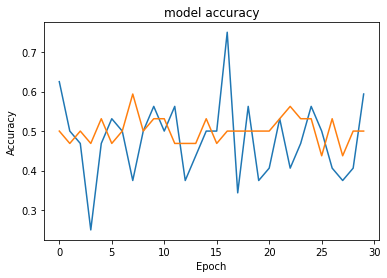

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

Text(0.5, 0, 'Epoch')

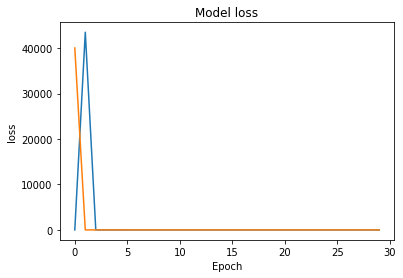

In [ ]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")

In [ ]:
import pandas as pd
test_file = os.listdir('./glasses-noglasses/test')
test_df = pd.DataFrame({'filename':test_file})

In [ ]:
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator()

In [ ]:
test_generator = test_gen.flow_from_dataframe(test_df, './glasses-noglasses/test',
                                              x_col='filename', y_col=None,
                                              target_size=(224, 224),
                                              class_mode=None,
                                              batch_size=1,
                                              shuffle=False)

Found 20 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/1))

<ipython-input-58-5ae5d5f60377>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/1))


In [ ]:
test_df['category'] = np.argmax(predict, axis=1)

In [ ]:
label_map = dict((v,k) for k, v in traindt.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
test_df

,filename,category
0,row-7-column-10.jpg,glasses
1,row-7-column-3.jpg,glasses
2,row-1-column-5.jpg,glasses
3,row-1-column-4.jpg,glasses
4,row-1-column-7.jpg,glasses
5,row-7-column-2.jpg,glasses
6,row-1-column-10.jpg,glasses
7,row-7-column-1.jpg,glasses
8,row-7-column-4.jpg,glasses
9,row-7-column-5.jpg,glasses


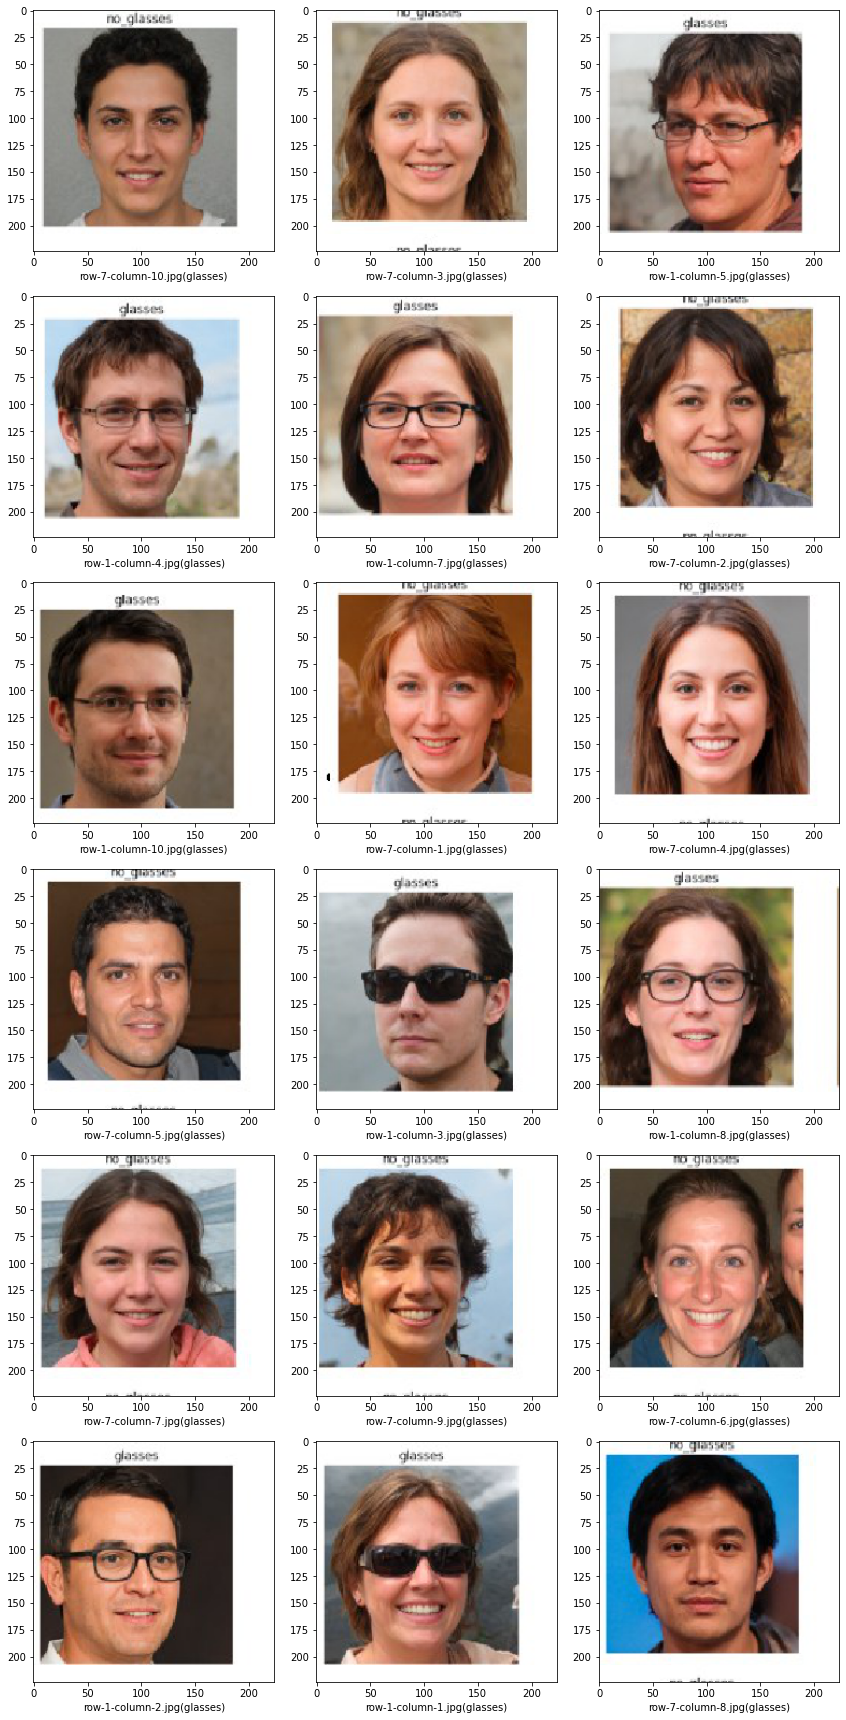

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
  filename = row['filename']
  category = row['category']
  img = image.load_img('./glasses-noglasses/test/' + filename, target_size=(224, 224))
  plt.subplot(6, 3, index+1)
  plt.imshow(img)
  plt.xlabel(filename + '(' + '{}'.format(category) + ')')
  
plt.tight_layout()
plt.show()